In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_train=pd.read_csv('/Users/KIIT0001/Desktop/PYTHON MARATHON/Steel plate defect prediction/train.csv')
df_test=pd.read_csv('/Users/KIIT0001/Desktop/PYTHON MARATHON/Steel plate defect prediction/test.csv')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

In [122]:
df_train.head()

,DED,ID,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,584,590,909972,909977,16,8,5,2274,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,0,1,808,816,728350,728372,433,20,54,44478,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,0,2,39,192,2212076,2212144,11388,705,420,1311391,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,0,3,781,789,3353146,3353173,210,16,29,3202,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,0,4,1540,1560,618457,618502,521,72,67,48231,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DED                    19219 non-null  int64  
 1   ID                     19219 non-null  int64  
 2   X_Minimum              19219 non-null  int64  
 3   X_Maximum              19219 non-null  int64  
 4   Y_Minimum              19219 non-null  int64  
 5   Y_Maximum              19219 non-null  int64  
 6   Pixels_Areas           19219 non-null  int64  
 7   X_Perimeter            19219 non-null  int64  
 8   Y_Perimeter            19219 non-null  int64  
 9   Sum_of_Luminosity      19219 non-null  int64  
 10  Minimum_of_Luminosity  19219 non-null  int64  
 11  Maximum_of_Luminosity  19219 non-null  int64  
 12  Length_of_Conveyer     19219 non-null  int64  
 13  TypeOfSteel_A300       19219 non-null  int64  
 14  TypeOfSteel_A400       19219 non-null  int64  
 15  St

In [124]:
df_train['ID'].nunique() == len(df_train)


True

In [42]:
df_train.describe(include='all')

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
print(df_train.columns.tolist())

['DED', 'ID', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']


In [126]:
id_train=df_train['ID']
id_test=df_test['ID']
df_train.drop(columns='ID',inplace=True)
df_test.drop(columns='ID',inplace=True)

In [127]:
df_train.isna().sum()

DED                      0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [128]:
df_train.duplicated().sum()

0

In [129]:
X_columns=df_test.columns
y_columns = [item for item in df_train.columns if item not in X_columns]

In [130]:
X_train,y_train=df_train[X_columns],df_train[y_columns]
X_test=df_test.copy()

In [131]:
df_train['Outside_Global_Index'].value_counts()

Outside_Global_Index
1.0    11022
0.0     7490
0.5      706
0.7        1
Name: count, dtype: int64

In [132]:
for i in X_columns:
  print(i,df_train[i].nunique())
  print('---')

DED 1
---
X_Minimum 1191
---
X_Maximum 1259
---
Y_Minimum 3345
---
Y_Maximum 3341
---
Pixels_Areas 1154
---
X_Perimeter 460
---
Y_Perimeter 331
---
Sum_of_Luminosity 2595
---
Minimum_of_Luminosity 162
---
Maximum_of_Luminosity 98
---
Length_of_Conveyer 99
---
TypeOfSteel_A300 2
---
TypeOfSteel_A400 2
---
Steel_Plate_Thickness 27
---
Edges_Index 1849
---
Empty_Index 1748
---
Square_Index 1118
---
Outside_X_Index 525
---
Edges_X_Index 1102
---
Edges_Y_Index 900
---
Outside_Global_Index 4
---
LogOfAreas 1072
---
Log_X_Index 206
---
Log_Y_Index 241
---
Orientation_Index 1598
---
Luminosity_Index 2046
---
SigmoidOfAreas 467
---


In [133]:
cat_col=[]

num_col=[]

for i in X_columns:

    if df_train[i].nunique()<=4:

        cat_col.append(i)

    else:

        num_col.append(i)

In [134]:
print(cat_col)
print(num_col)

['DED', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index']
['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']


In [135]:
df_train[cat_col].columns

Index(['DED', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index'], dtype='object')

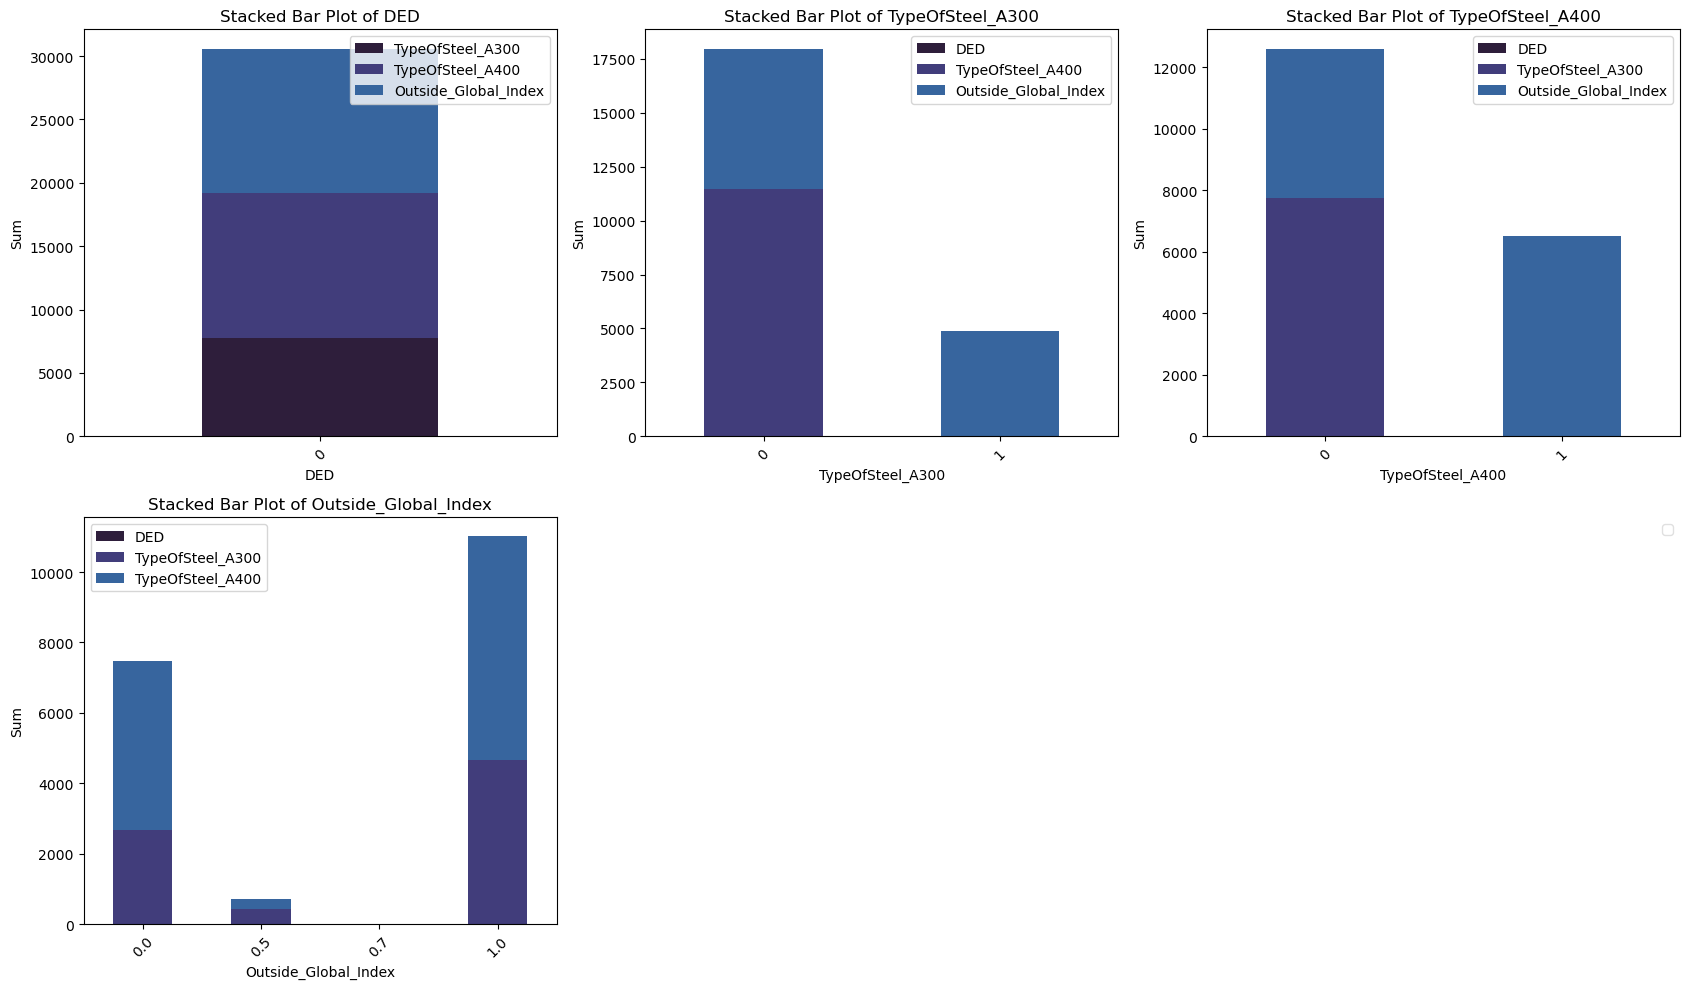

In [136]:
# Calculate number of rows and columns for subplots

num_plots = len(cat_col)

num_cols = 3  # Number of columns in the subplot grid

num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

#Set Pallete

sns.set_palette('mako')

# Create subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 5*num_rows))

# Flatten the axes array if it's multidimensional

axes = axes.flatten()



# Create a stacked bar plot for each categorical column

for i, column in enumerate(cat_col):

    ax = axes[i]

    df_train[cat_col].groupby(column).sum().plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(f'Stacked Bar Plot of {column}')

    ax.set_xlabel(column)

    ax.set_ylabel('Sum')

    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

    

    handles, labels = ax.get_legend_handles_labels()

        

# Add a single legend for the entire subplot



leg = plt.legend()

leg.get_frame().set_alpha(0.6) 

# Hide any empty subplots

for j in range(i + 1, len(axes)):

    axes[j].axis('off')



plt.tight_layout()

plt.show()

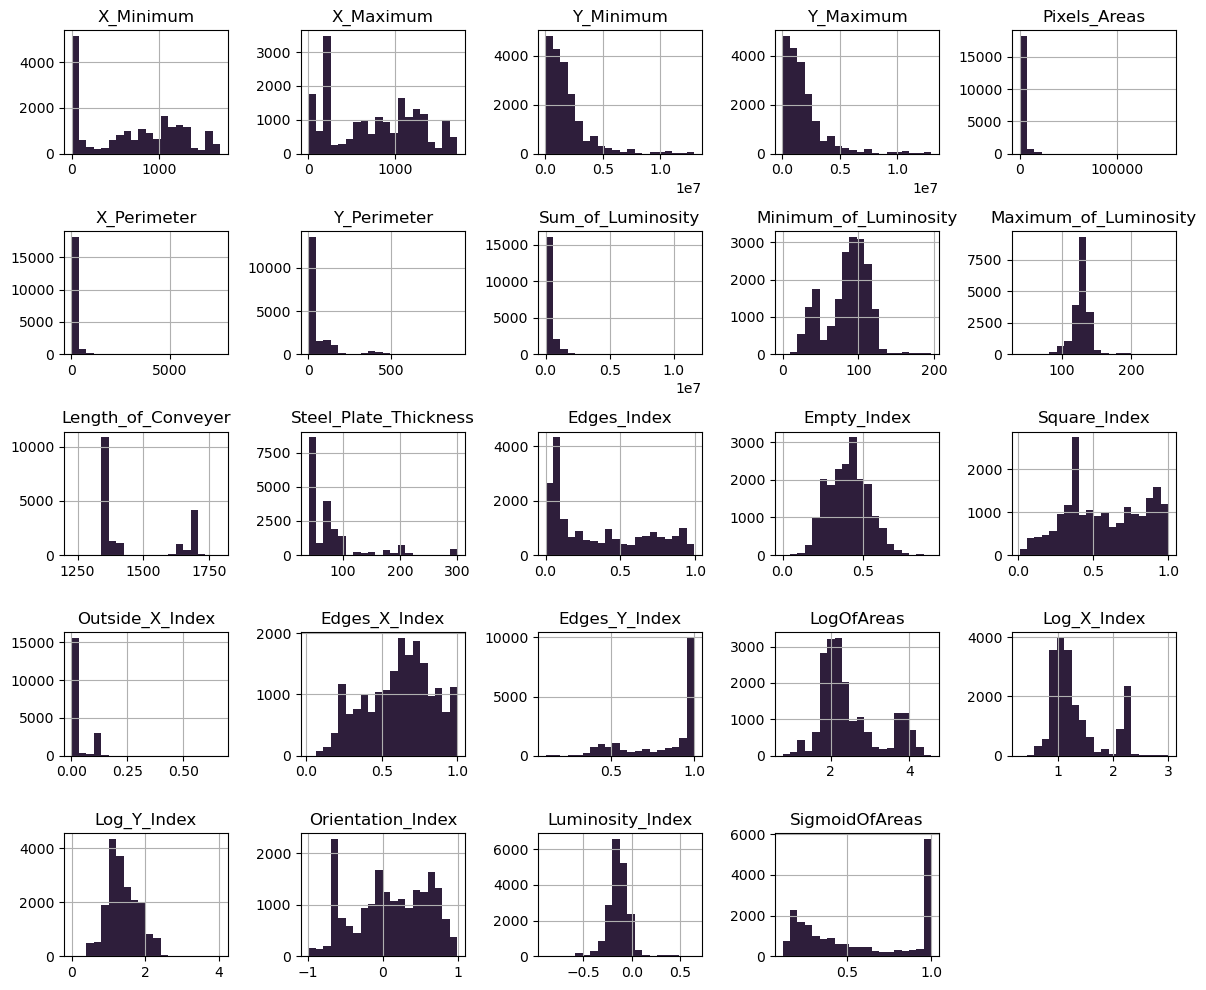

In [137]:
df_train[num_col].hist(bins=20,figsize=(12,10))

plt.tight_layout()

plt.show()

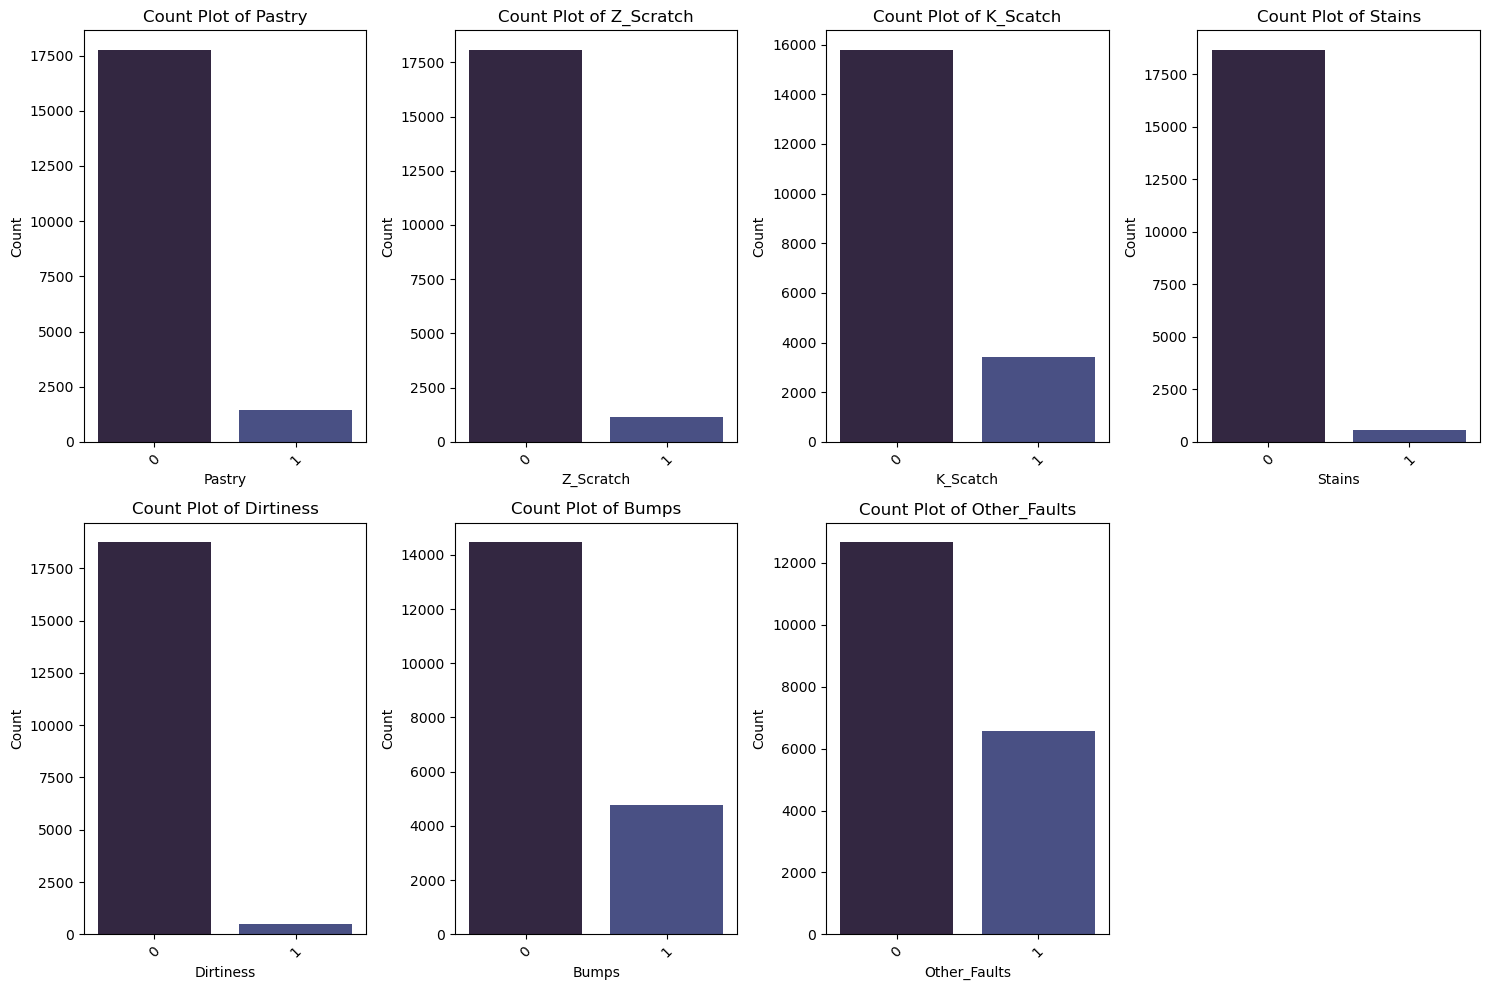

In [138]:
palette=sns.color_palette('mako',5)

num_plots = len(y_columns)

num_cols = 4  # Number of columns in the plot grid

num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()  # Flatten the axes array if it's multidimensional

for i, column in enumerate(y_columns):

    ax = axes[i]

    sns.countplot(x=column, data=df_train, ax=ax,palette=palette)

    ax.set_title(f'Count Plot of {column}')

    ax.set_xlabel(column)

    ax.set_ylabel('Count')

    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

#Remove Empty spaces

for j in range(i + 1, len(axes)):

    axes[j].axis('off')

plt.tight_layout()

plt.show()

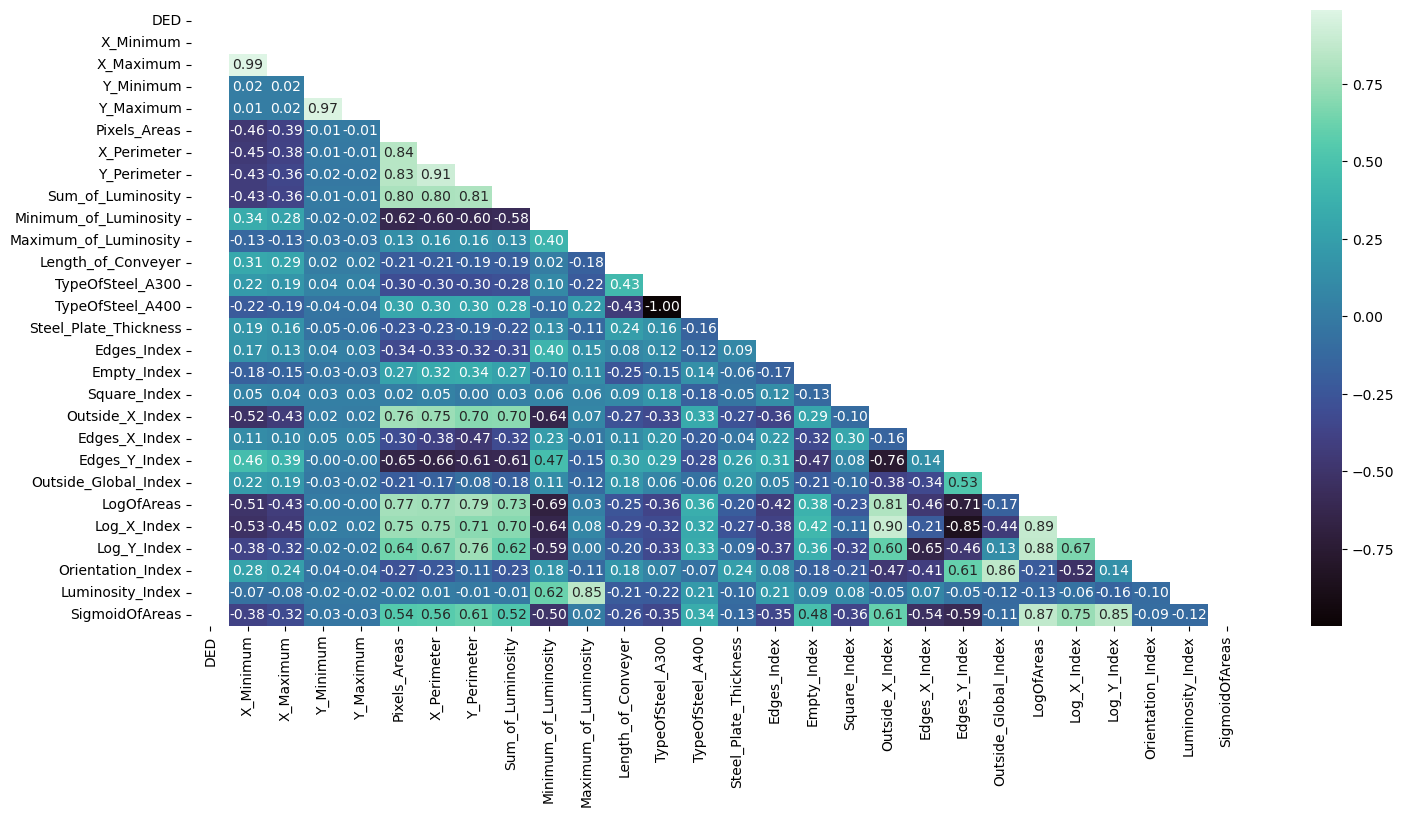

In [139]:
corr = df_train[X_columns].corr(numeric_only=True)

mask = np.triu(corr)

mask=mask

plt.figure(figsize=(17, 8))

sns.heatmap(corr, annot=True,mask=mask, cmap='mako', fmt='.2f')

plt.show()

In [140]:
# First, install the missing package
!pip install xgboost

# Then import all your libraries
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_squared_error, roc_auc_score, precision_score, recall_score, roc_curve, ConfusionMatrixDisplay, confusion_matrix, auc
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.multioutput import MultiOutputClassifier

In [141]:
#Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit
    
#Outlier Count    
def outlier_percentage(dataframe, column):
    low_limit, up_limit = outlier_threshhold(dataframe, column)
    outliers = [x for x in dataframe[column] if (x > up_limit) or (x < low_limit)]  # Changed | to or
    print(column)  # Changed col to column
    print("Outliers percentage:", len(outliers) / dataframe[column].shape[0] * 100, "%")
    # print("Outliers Count :", len(outliers))
    print("-------------------------")
#Checking Outliers 
def check_outliers(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers=(dataframe[column]>up_limit) | (dataframe[column]<low_limit)
    if outliers.any():
        return True
    else:
        return False
#Replace with IQR     
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit  
for col in (num_col):
    outlier_percentage(df_train,col)

X_Minimum
Outliers percentage: 0.0 %
-------------------------
X_Maximum
Outliers percentage: 0.0 %
-------------------------
Y_Minimum
Outliers percentage: 5.817160101982413 %
-------------------------
Y_Maximum
Outliers percentage: 5.785940995889485 %
-------------------------
Pixels_Areas
Outliers percentage: 19.366252146313546 %
-------------------------
X_Perimeter
Outliers percentage: 19.340236224569438 %
-------------------------
Y_Perimeter
Outliers percentage: 14.490868411467819 %
-------------------------
Sum_of_Luminosity
Outliers percentage: 19.907383318590977 %
-------------------------
Minimum_of_Luminosity
Outliers percentage: 1.097871897601332 %
-------------------------
Maximum_of_Luminosity
Outliers percentage: 6.722514178677351 %
-------------------------
Length_of_Conveyer
Outliers percentage: 0.0 %
-------------------------
Steel_Plate_Thickness
Outliers percentage: 11.306519589989074 %
-------------------------
Edges_Index
Outliers percentage: 0.0 %
--------------

In [142]:
for column in num_col:

    replace_with_threshholds(df_train,df_test,column)

    print(column,check_outliers(df_train,column))

X_Minimum False
X_Maximum False
Y_Minimum False
Y_Maximum False
Pixels_Areas False
X_Perimeter False
Y_Perimeter False
Sum_of_Luminosity False
Minimum_of_Luminosity False
Maximum_of_Luminosity False
Length_of_Conveyer False
Steel_Plate_Thickness False
Edges_Index False
Empty_Index False
Square_Index False
Outside_X_Index False
Edges_X_Index False
Edges_Y_Index False
LogOfAreas False
Log_X_Index False
Log_Y_Index False
Orientation_Index False
Luminosity_Index False
SigmoidOfAreas False


In [143]:
X_train,y_train=df_train[X_columns],df_train[y_columns]
X_test=df_test
print("The Shape of X_train is :",X_train.shape)
print("The Shape of y_train is :",y_train.shape)
print("The Shape of X_test is :",X_test.shape)

The Shape of X_train is : (19219, 28)
The Shape of y_train is : (19219, 7)
The Shape of X_test is : (12814, 28)


In [144]:
def detect_skewness(dataframe, threshold=0.5):
    """
    Detects left or right skewed columns in a pandas DataFrame.
    Parameters:
    dataframe (pandas DataFrame): The DataFrame to analyze.
    threshold (float): The threshold for considering a column as skewed.
                      Default is 0.5.
    Returns:
    skewed_columns (list): A list of column names that are skewed.
    """
    skewed_columns = []
    for column in dataframe.columns:
        skewness = dataframe[column].skew()
        if abs(skewness) > threshold:
            #skewed.append((column, skewness))
            skewed_columns.append(column)
    return skewed_columns 
skewed_cols = detect_skewness(df_train[num_col])
print("Skewed columns:", skewed_cols)

Skewed columns: ['Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index', 'Outside_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index']


In [145]:
class OrdinalEncodeColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.encoder = None
    def fit(self, X, y=None):
        ordinal_data = X[self.columns].values
        self.encoder = OrdinalEncoder()
        self.encoder.fit(ordinal_data)
        return self
    def transform(self, X):
        X_new = X.copy()
        ordinal_data = X_new[self.columns].values
        encoded_data = self.encoder.transform(ordinal_data)
        X_new[self.columns] = encoded_data
        return X_new
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [146]:
class StandardScaleTransform(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        self.scaler_ = None
    def fit(self, X, y=None):
        self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        return self
    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
        return X_copy
    def fit_transform(self, X, y=None):
        self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        return self.transform(X)

In [147]:
skewed_cols

['Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Length_of_Conveyer',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Outside_X_Index',
 'Edges_Y_Index',
 'LogOfAreas',
 'Log_X_Index']

# Assistant
The error occurs because the code is trying to use custom transformer classes (`LogTransform`, `StandardScaleTransform`, and `OrdinalEncodeColumns`) that haven't been defined or imported.

Would you like me to provide the corrected code?

# User
yes

In [148]:
class LogTransform(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            if col in X_copy.columns:
                # Adding a small value to avoid log(0)
                X_copy[col] = np.log1p(X_copy[col])
        return X_copy
class StandardScaleTransform(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = StandardScaler()
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self
    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = self.scaler.transform(X_copy[self.columns])
        return X_copy
class OrdinalEncodeColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.encoders = {col: OrdinalEncoder() for col in columns}
    def fit(self, X, y=None):
        for col in self.columns:
            self.encoders[col].fit(X[[col]])
        return self
    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = self.encoders[col].transform(X_copy[[col]])
        return X_copy

In [149]:
class FullPipeline1:
    def __init__(self) :
        self.log_cols=['Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity',
                       'Length_of_Conveyer','Steel_Plate_Thickness','Edges_Index','Outside_X_Index','Edges_Y_Index','LogOfAreas','Log_X_Index']
        self.numerical_cols=['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas','X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
                             'Minimum_of_Luminosity', 'Maximum_of_Luminosity','Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index',
                             'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index','Edges_Y_Index', 'LogOfAreas', 'Log_X_Index', 
                             'Log_Y_Index','Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']
        self.categorical_cols=['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index']
        self.full_pipeline=Pipeline([
            ('log_transform',LogTransform(self.log_cols)),
            ('scale', StandardScaleTransform(self.numerical_cols)),
            ('label_encode', OrdinalEncodeColumns(columns=self.categorical_cols)),
        ])
    def fit_transform(self, X_train):
        X_train = self.full_pipeline.fit_transform(X_train)
        return X_train
    def transform(self, X_test):
        X_test = self.full_pipeline.transform(X_test)
        return X_test
f1=FullPipeline1()
X_1_train_f1=f1.fit_transform(X_train)
X_1_test_f1=f1.transform(X_test)

In [150]:
X_1_train_f1

,DED,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0,-0.236778,-0.327831,-0.142268,-0.142409,-2.093991,-1.404671,-1.719257,-1.933519,0.999043,...,-0.776286,1.732355,0.740012,0.0,-2.085807,-0.979930,-1.705806,-1.235969,1.376784,-1.294971
1,0,0.184647,0.124329,-0.335401,-0.335841,0.539182,-0.470906,0.653400,0.505132,-0.517959,...,-0.903078,-1.640168,0.740012,3.0,0.330904,-1.374644,0.846668,1.310641,-1.698422,1.135420
2,0,-1.262119,-1.124112,0.628306,0.629467,1.547135,1.607946,1.594987,1.530067,-1.964403,...,1.880382,-1.701772,-2.090675,0.0,1.921926,1.816684,2.025094,-0.232212,0.483880,1.288636
3,0,0.133850,0.070310,0.989156,0.990897,-0.046962,-0.703779,0.004289,-1.652903,1.034322,...,-0.903078,-1.078081,0.469171,3.0,-0.105397,-1.374644,0.103205,1.156438,1.060016,-0.509925
4,0,1.561802,1.612854,-0.477283,-0.477923,0.689235,0.902180,0.880617,0.571578,-0.094610,...,0.339729,-1.817787,0.686211,3.0,0.504153,0.405212,1.213213,1.667237,-1.122286,1.288034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,0,0.073646,0.006287,-1.746355,-1.749111,-2.047536,-2.052442,-1.914505,-1.963256,1.316555,...,-0.903078,1.732355,-0.072767,0.0,-2.028339,-1.374644,-1.945147,-0.503708,1.534105,-0.848265
19215,0,0.024731,-0.037729,0.730462,0.731771,0.030151,-0.640788,-0.108541,0.099798,0.681531,...,-0.725623,0.533086,0.431526,3.0,-0.045621,-0.572021,0.062697,1.270245,0.436045,-0.102653
19216,0,-1.324204,-1.446226,0.335319,0.336007,1.016698,1.403032,1.282860,0.890040,-1.541054,...,0.398063,-1.927057,0.566037,3.0,0.658765,0.444566,1.184561,1.372159,-2.288908,1.287733
19217,0,-1.318560,-1.472235,0.406586,0.407359,-0.459572,-0.917749,-0.108541,-0.396970,0.117065,...,-0.700302,0.694517,0.740012,3.0,-0.438899,-0.572021,0.062697,1.759923,0.252150,-0.665248


In [151]:
#Split your data into Train and validation Data
X_ft_train,X_ft_valid,y_ft_train,y_ft_valid=train_test_split(X_1_train_f1,y_train,test_size=0.3,random_state=42)
#Create and train a Random Forest Classfier
model=RandomForestClassifier(random_state=42)
model.fit(X_ft_train,y_ft_train)
feature_importance=model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)
feature_importance_df

,Feature,Importance
22,LogOfAreas,0.067580
18,Outside_X_Index,0.053021
6,X_Perimeter,0.052689
23,Log_X_Index,0.050450
5,Pixels_Areas,0.049634
9,Minimum_of_Luminosity,0.048434
11,Length_of_Conveyer,0.044167
1,X_Minimum,0.041745
8,Sum_of_Luminosity,0.041024
27,SigmoidOfAreas,0.040504


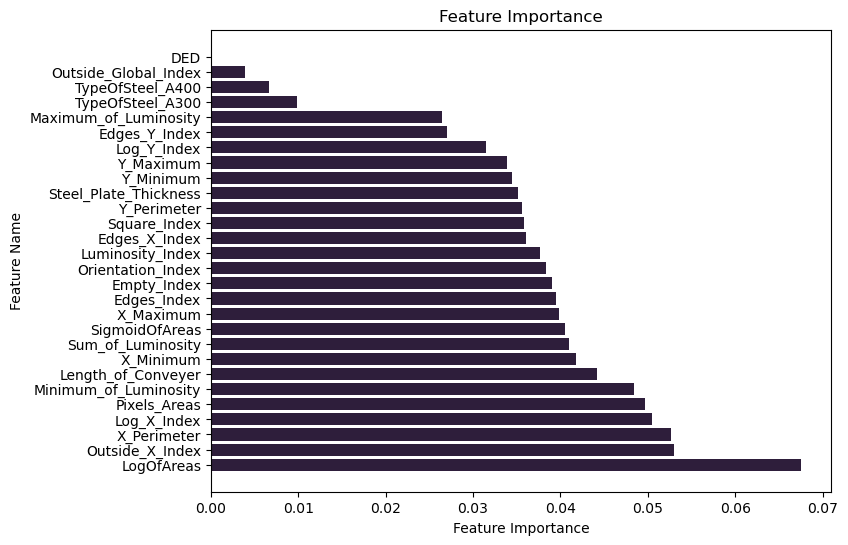

In [152]:
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

In [153]:
!pip install catboost


In [154]:
model_name = []
roc_auc_scores = []       
all_roc_auc_scores = []  
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    CatBoostClassifier(verbose=0, random_state=42)
]
target_labels = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
for model in models:
    roc_auc_scores_model = []
    for defect_category in target_labels:
        model.fit(X_ft_train, y_ft_train[defect_category])
        y_predict_proba = model.predict_proba(X_ft_valid)[:, 1]
        roc_auc = roc_auc_score(y_ft_valid[defect_category], y_predict_proba) * 100
        roc_auc_scores_model.append(roc_auc)
    model_name.append(model.__class__.__name__)
    roc_auc_scores.append(np.mean(roc_auc_scores_model))
    all_roc_auc_scores.append(roc_auc_scores_model)


In [155]:
for name, mean_roc_score in zip(model_name, roc_auc_scores):
    print(f"Mean ROC Score for {name}: {mean_roc_score}")

Mean ROC Score for DecisionTreeClassifier: 67.17772137292418
Mean ROC Score for RandomForestClassifier: 86.74058519071866
Mean ROC Score for GradientBoostingClassifier: 87.94896677861571
Mean ROC Score for ExtraTreesClassifier: 86.60033526090727
Mean ROC Score for AdaBoostClassifier: 87.46315612431042
Mean ROC Score for LogisticRegression: 85.3899879473174
Mean ROC Score for XGBClassifier: 87.29192988988224
Mean ROC Score for CatBoostClassifier: 88.11014069565086


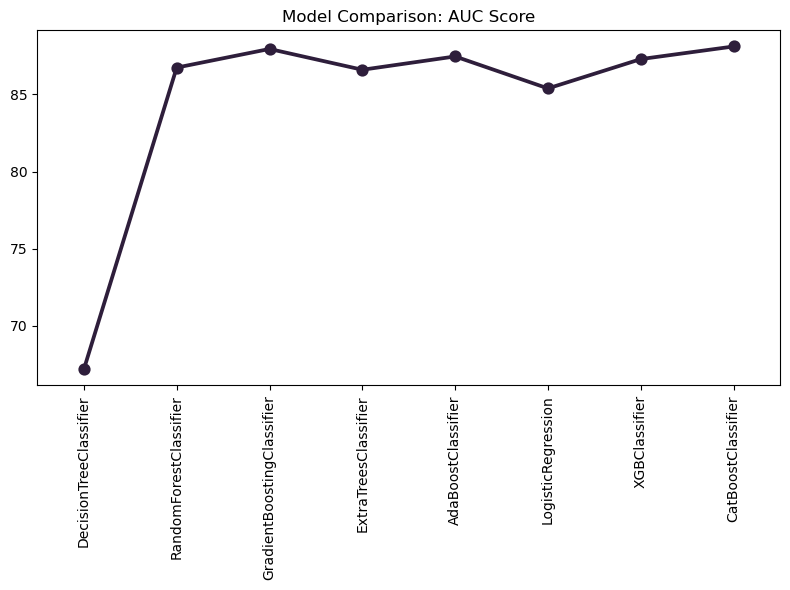

In [156]:
plt.figure(figsize=(8,6))
sns.pointplot(x=model_name,y=roc_auc_scores)
plt.xticks(rotation=90)
plt.title('Model Comparison: AUC Score')
plt.tight_layout()
plt.show()

In [157]:
model=GradientBoostingClassifier(random_state=42)
submission_df = pd.DataFrame({'ID': id_test})
for defect_category in ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']:
    model.fit(X_1_train_f1, y_train[defect_category])
    y_pred_proba = model.predict_proba(X_1_test_f1)
    submission_df[defect_category] = y_pred_proba[:, 1]  # Select the probabilities for class 1 (positive class)
print(submission_df)
submission_df.to_csv("submission.csv", index=False)

          ID    Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
0      19219  0.450455   0.003730  0.003779  0.001045   0.013297  0.123172   
1      19220  0.216038   0.010409  0.019686  0.000953   0.196462  0.180402   
2      19221  0.005737   0.030476  0.031041  0.001570   0.011176  0.270883   
3      19222  0.136574   0.002100  0.002535  0.001200   0.016768  0.261913   
4      19223  0.004790   0.003755  0.002750  0.001828   0.006509  0.622278   
...      ...       ...        ...       ...       ...        ...       ...   
12809  32028  0.045879   0.076441  0.004258  0.001041   0.030875  0.201873   
12810  32029  0.152694   0.006294  0.022141  0.007667   0.127496  0.220636   
12811  32030  0.003918   0.002282  0.944078  0.000957   0.002037  0.007459   
12812  32031  0.416092   0.011821  0.026145  0.000622   0.059434  0.217460   
12813  32032  0.006432   0.013737  0.896842  0.000953   0.002536  0.009478   

       Other_Faults  
0          0.451802  
1          0.293906